In [122]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import numpy as np

In [123]:
nba_pytha_path = "Resources/nba_conf_wise.xlsx"

In [124]:
nba_east = pd.read_excel(nba_pytha_path,"eastern")
nba_west = pd.read_excel(nba_pytha_path,"western")


In [125]:
nba_east["Conf"] = "Eastern"
nba_east.head()

,Eastern Conference,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf
0,Philadelphia 76ers (1),31,13,0.705,—,115.0,109.4,5.03,Eastern
1,Milwaukee Bucks (2),29,14,0.674,1.5,120.0,112.6,6.99,Eastern
2,Brooklyn Nets (3),30,15,0.667,1.5,119.4,115.2,3.86,Eastern
3,Charlotte Hornets (4),22,21,0.512,8.5,112.0,112.7,-0.83,Eastern
4,Miami Heat (5),22,22,0.500,9,106.2,107.6,-1.21,Eastern


In [126]:
nba_west["Conf"] = "Western"
nba_west.head()

,Western Conference,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf
0,Utah Jazz (1),32,11,0.744,—,116.8,108.0,9.40,Western
1,Phoenix Suns (2),29,14,0.674,3,113.9,107.4,6.12,Western
2,Los Angeles Clippers (3),29,16,0.644,4,115.2,109.1,5.95,Western
3,Los Angeles Lakers (4),28,16,0.636,4.5,111.5,106.7,4.23,Western
4,Denver Nuggets (5),26,18,0.591,6.5,115.6,111.0,4.58,Western


In [127]:
nba_full = pd.concat([nba_east.rename(columns ={"Eastern Conference":"Team"}),nba_west.rename(columns = {"Western Conference":"Team"})],ignore_index = 1)
nba_full.head()
nba_full.tail()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf
25,New Orleans Pelicans (11),19,24,0.442,13,115.6,115.1,0.76,Western
26,Sacramento Kings (12),19,25,0.432,13.5,114.5,119.0,-4.12,Western
27,Oklahoma City Thunder (13),19,25,0.432,13.5,106.4,112.0,-5.51,Western
28,Houston Rockets (14),12,31,0.279,20,106.9,113.6,-7.45,Western
29,Minnesota Timberwolves (15),10,34,0.227,22.5,109.3,117.3,-7.52,Western


In [130]:
for x in range(len(nba_full["Team"])):
    nba_full["Team"][x] = nba_full["Team"][x].rsplit("(")[0]

<ipython-input-130-95eaeed62e32>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_full["Team"][x] = nba_full["Team"][x].rsplit("(")[0]


In [131]:
nba_full.head()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf
0,Philadelphia 76ers,31,13,0.705,—,115.0,109.4,5.03,Eastern
1,Milwaukee Bucks,29,14,0.674,1.5,120.0,112.6,6.99,Eastern
2,Brooklyn Nets,30,15,0.667,1.5,119.4,115.2,3.86,Eastern
3,Charlotte Hornets,22,21,0.512,8.5,112.0,112.7,-0.83,Eastern
4,Miami Heat,22,22,0.500,9,106.2,107.6,-1.21,Eastern


In [132]:
nba_full["pts_ratio"] = nba_full["PS/G"]/nba_full["PA/G"]
nba_full["win%"]=nba_full["W"]/(nba_full["W"]+nba_full["L"])


In [133]:
min =10
min_exp = 0
for exp in range(100): 
    mad =abs(nba_full["pts_ratio"]**exp/(nba_full["pts_ratio"]**exp+1)-nba_full["win%"]).mean()
    if mad < min:
        min = mad
        min_exp = exp
print(min_exp)
print(min)
nba_full["pred.win%"]= nba_full["pts_ratio"]**min_exp/(nba_full["pts_ratio"]**min_exp+1)
nba_full.head()

12
0.04306617363647755


,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf,pts_ratio,win%,pred.win%
0,Philadelphia 76ers,31,13,0.705,—,115.0,109.4,5.03,Eastern,1.051188,0.704545,0.645440
1,Milwaukee Bucks,29,14,0.674,1.5,120.0,112.6,6.99,Eastern,1.065719,0.674419,0.682178
2,Brooklyn Nets,30,15,0.667,1.5,119.4,115.2,3.86,Eastern,1.036458,0.666667,0.605805
3,Charlotte Hornets,22,21,0.512,8.5,112.0,112.7,-0.83,Eastern,0.993789,0.511628,0.481317
4,Miami Heat,22,22,0.500,9,106.2,107.6,-1.21,Eastern,0.986989,0.500000,0.460791


In [134]:
nba_full["PW"] = (nba_full["pred.win%"]*72).round(0)
nba_full["PL"] = 72 - nba_full["PW"]
nba_full.head()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf,pts_ratio,win%,pred.win%,PW,PL
0,Philadelphia 76ers,31,13,0.705,—,115.0,109.4,5.03,Eastern,1.051188,0.704545,0.645440,46.0,26.0
1,Milwaukee Bucks,29,14,0.674,1.5,120.0,112.6,6.99,Eastern,1.065719,0.674419,0.682178,49.0,23.0
2,Brooklyn Nets,30,15,0.667,1.5,119.4,115.2,3.86,Eastern,1.036458,0.666667,0.605805,44.0,28.0
3,Charlotte Hornets,22,21,0.512,8.5,112.0,112.7,-0.83,Eastern,0.993789,0.511628,0.481317,35.0,37.0
4,Miami Heat,22,22,0.500,9,106.2,107.6,-1.21,Eastern,0.986989,0.500000,0.460791,33.0,39.0


In [135]:
nba_west_pred_standings = nba_full[nba_full["Conf"]=="Western"].sort_values(['PW'],ascending = 0).reset_index(drop=1)
nba_east_pred_standings = nba_full[nba_full["Conf"]=="Eastern"].sort_values(['PW'],ascending = 0).reset_index(drop=1)
seeds = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
nba_west_pred_standings.insert(0,"seed",seeds)
nba_east_pred_standings.insert(0,"seed",seeds)

In [136]:
nba_west_pred_standings

,seed,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf,pts_ratio,win%,pred.win%,PW,PL
0,1,Utah Jazz,32,11,0.744,—,116.8,108.0,9.40,Western,1.081481,0.744186,0.719096,52.0,20.0
1,2,Phoenix Suns,29,14,0.674,3,113.9,107.4,6.12,Western,1.060521,0.674419,0.669324,48.0,24.0
2,3,Los Angeles Clippers,29,16,0.644,4,115.2,109.1,5.95,Western,1.055912,0.644444,0.657654,47.0,25.0
3,4,Los Angeles Lakers,28,16,0.636,4.5,111.5,106.7,4.23,Western,1.044986,0.636364,0.629026,45.0,27.0
4,5,Denver Nuggets,26,18,0.591,6.5,115.6,111.0,4.58,Western,1.041441,0.590909,0.619463,45.0,27.0
5,6,Dallas Mavericks,23,19,0.548,8.5,112.5,111.1,2.04,Western,1.012601,0.547619,0.537497,39.0,33.0
6,7,Memphis Grizzlies,21,20,0.512,10,111.5,110.9,0.57,Western,1.005410,0.512195,0.516181,37.0,35.0
7,8,New Orleans Pelicans,19,24,0.442,13,115.6,115.1,0.76,Western,1.004344,0.441860,0.513001,37.0,35.0
8,9,Golden State Warriors,22,22,0.500,10.5,112.5,113.0,0.18,Western,0.995575,0.500000,0.486699,35.0,37.0
9,10,Portland Trail Blazers,25,18,0.581,7,114.4,115.5,-1.51,Western,0.990476,0.581395,0.471323,34.0,38.0


In [138]:
nba_east_pred_standings

,seed,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf,pts_ratio,win%,pred.win%,PW,PL
0,1,Milwaukee Bucks,29,14,0.674,1.5,120.0,112.6,6.99,Eastern,1.065719,0.674419,0.682178,49.0,23.0
1,2,Philadelphia 76ers,31,13,0.705,—,115.0,109.4,5.03,Eastern,1.051188,0.704545,0.645440,46.0,26.0
2,3,Brooklyn Nets,30,15,0.667,1.5,119.4,115.2,3.86,Eastern,1.036458,0.666667,0.605805,44.0,28.0
3,4,Atlanta Hawks,22,22,0.500,9,112.5,110.7,1.45,Eastern,1.016260,0.500000,0.548238,39.0,33.0
4,5,New York Knicks,22,22,0.500,9,105.3,105.0,-0.31,Eastern,1.002857,0.500000,0.508558,37.0,35.0
5,6,Boston Celtics,21,23,0.477,10,112.2,111.5,1.02,Eastern,1.006278,0.477273,0.518766,37.0,35.0
6,7,Indiana Pacers,20,23,0.465,10.5,113.1,113.2,0.57,Eastern,0.999117,0.465116,0.497349,36.0,36.0
7,8,Toronto Raptors,18,26,0.409,13,112.5,112.4,-0.10,Eastern,1.000890,0.409091,0.502668,36.0,36.0
8,9,Charlotte Hornets,22,21,0.512,8.5,112.0,112.7,-0.83,Eastern,0.993789,0.511628,0.481317,35.0,37.0
9,10,Chicago Bulls,19,24,0.442,11.5,113.0,113.7,-1.07,Eastern,0.993843,0.441860,0.481482,35.0,37.0


<IPython.core.display.Javascript object>


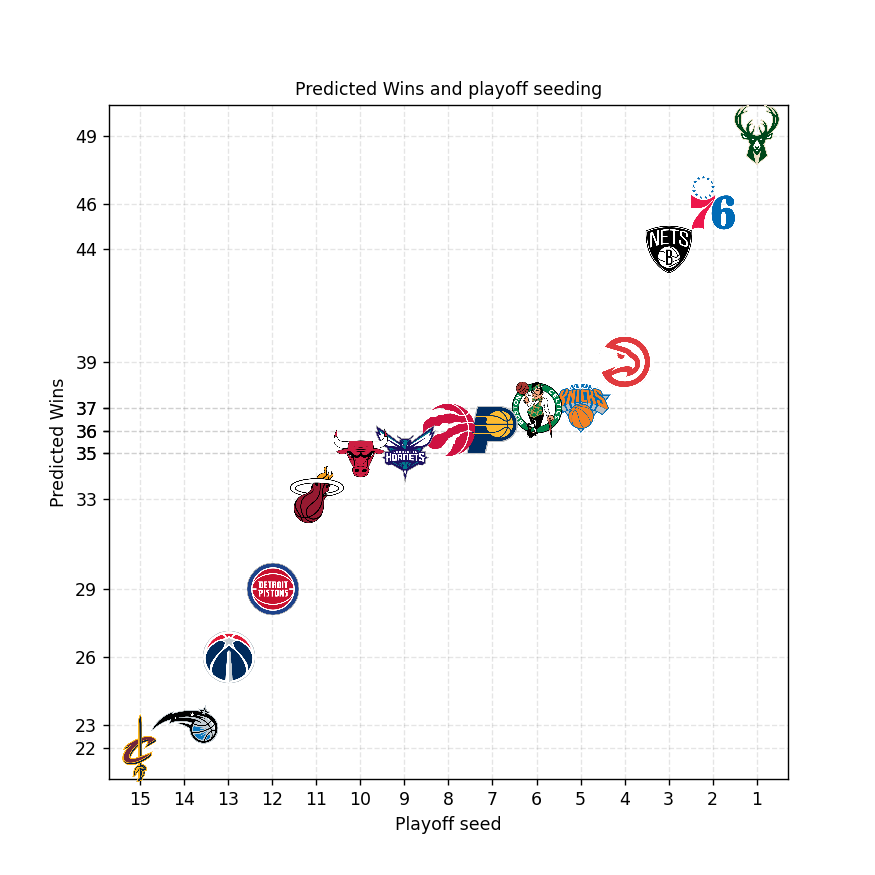

<IPython.core.display.Javascript object>


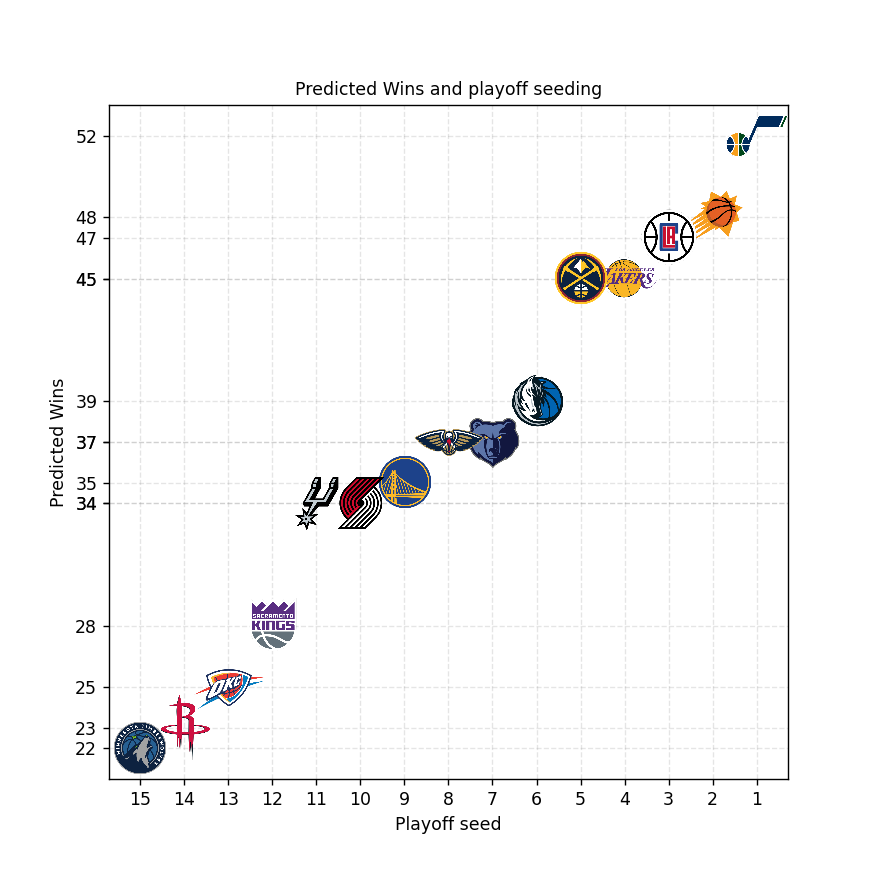

In [139]:
def main(conf):

    image_path = []
    team_name = []

    for x in conf["Team"]:
        x = x.split()
        if x[-1] == "76ers":
            x[-1] = "sixers"
        team_name.append(x[-1].lower())
    for n in team_name:
        image_path.append('../images/'+n+'.png')

    
    fig, ax = plt.subplots(figsize=(7,7))

    for x, y, image_pat in zip(conf["seed"],conf["PW"],image_path):
        imscatter(x, y, image_pat, zoom=0.1, ax=ax)
        plt.gca().invert_xaxis()

    plt.gca().set_xticks(conf["seed"])
    plt.gca().set_yticks(conf["PW"])
    plt.title('Predicted Wins and playoff seeding', fontsize=10)       
    plt.xlabel("Playoff seed", fontsize=10)
    plt.ylabel("Predicted Wins", fontsize=10)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed',alpha = 0.2)
    ax.xaxis.grid(color='gray', linestyle='dashed',alpha = 0.2)
    

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

main(nba_east_pred_standings)
main(nba_west_pred_standings)



Nuggets Lakers, May 3 game will be decider for home court advantage
Pelicans will be 7th seed v/s grizzlies as they have better record and have homecourt for playin	
Spurs have advantage and need to win 1/2 games against blazers to get into playin tournament and face the warriors
Knicks have advantage and need to win 1/2 games against Celtics for higher seed
Pacers Raptors, May 16 game will be decider for home court advantage in playin tournament
Bulls have advantage and need to win 1/2 games against Hornets for higher seed in playin tournament
